In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset
iterator = ImageDataGenerator(rescale=1/255,
                              #Randomly increase or decrease the size of the image by up to 10% 
                              zoom_range=0.1, 
                              #Randomly rotate the image between -20,20 degrees
                              rotation_range=20,
                              #Shift the image along its width by up to +/- 5%
                              width_shift_range=0.05,
                              #Shift the image along its height by up to +/- 5%
                              height_shift_range=0.05)
Batch_size = 16
# Load the training dataset
train_iterator = iterator.flow_from_directory(
    'Covid19-dataset/train',
    class_mode = "categorical",
    color_mode = "grayscale",
    target_size=(256, 256),
    batch_size=Batch_size)

Found 251 images belonging to 3 classes.


In [3]:
# Load the validation dataset
validation_iterator = iterator.flow_from_directory(
    'Covid19-dataset/test',
    class_mode = "categorical",
    color_mode = "grayscale",
    target_size=(256, 256),
    batch_size=Batch_size)

Found 66 images belonging to 3 classes.


In [4]:
# Build the model 
model = Sequential()
model.add(tf.keras.Input(shape=(256,256,1)))

# Convolutional layers
model.add(layers.Conv2D(64, kernel_size= (6,6), strides = 2, activation='relu', ))
model.add(layers.MaxPooling2D(pool_size = (4, 4), padding="valid"))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, kernel_size= (4,4), strides = 4, activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding="valid"))
model.add(layers.Dropout(0.3))

# Hidden layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])

display(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,859 (210.39 KB)

 Trainable params: 53,859 (210.39 KB)

 Non-trainable params: 0 (0.00 B)

None

In [5]:
# Fit the model 
history = model.fit(train_iterator, 
                    steps_per_epoch = 8,
                    epochs = 30, 
                    validation_data = validation_iterator, 
                    validation_steps = 8, 
                    callbacks=[EarlyStopping(monitor='val_loss', mode = "min", patience=10)])

Epoch 1/30


c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - auc: 0.5086 - categorical_accuracy: 0.2907 - loss: 1.1045 - val_auc: 0.5760 - val_categorical_accuracy: 0.4545 - val_loss: 1.0769
Epoch 2/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.5680 - categorical_accuracy: 0.4533 - loss: 1.0979

c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - auc: 0.5792 - categorical_accuracy: 0.4628 - loss: 1.0912 - val_auc: 0.7181 - val_categorical_accuracy: 0.4091 - val_loss: 1.0486
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - auc: 0.0000e+00 - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.7118 - val_categorical_accuracy: 0.4091 - val_loss: 1.0458
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - auc: 0.7089 - categorical_accuracy: 0.6082 - loss: 0.9841 - val_auc: 0.8170 - val_categorical_accuracy: 0.5455 - val_loss: 0.9652
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - auc: 0.7022 - categorical_accuracy: 0.5097 - loss: 0.9956 - val_auc: 0.8333 - val_categorical_accuracy: 0.6364 - val_loss: 0.9108
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - auc: 0.0000e+00 - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.8057 - val_categorical_accuracy: 0.5758 - val_loss: 0.9186
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - auc: 0.7392 - categorical_accur

In [6]:
# Evaluate the model 
loss, acc, auc = model.evaluate(validation_iterator, batch_size=4)
print(f'Loss: {loss}, Accuracy: {acc}, AUC: {auc}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - auc: 0.8843 - categorical_accuracy: 0.6967 - loss: 0.6237
Loss: 0.6170495748519897, Accuracy: 0.6969696879386902, AUC: 0.8916437029838562


In [7]:
# Evaluate the model
pred = model.predict(validation_iterator)

true_labels = validation_iterator.labels
predicted_labels = np.argmax(pred, axis=1)

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=validation_iterator.class_indices.keys())
print(report)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

       Covid       0.50      0.38      0.43        26
      Normal       0.59      0.50      0.54        20
   Pneumonia       0.38      0.55      0.45        20

    accuracy                           0.47        66
   macro avg       0.49      0.48      0.47        66
weighted avg       0.49      0.47      0.47        66



In [8]:
df_pred = pd.DataFrame(zip(true_labels, predicted_labels), columns=["true_labels", "predicted_labels"])
df_pred["results"] = df_pred["true_labels"] == df_pred["predicted_labels"]

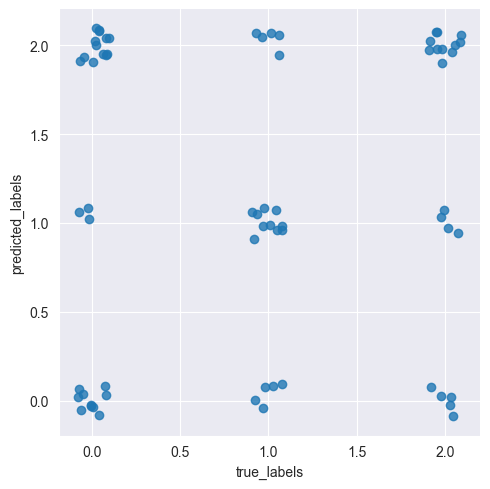

In [13]:

sns.lmplot(data = df_pred,
            x = "true_labels",
            y="predicted_labels",
            x_jitter=0.1, 
            y_jitter=0.1,
            fit_reg=False)
plt.show()
plt.close()

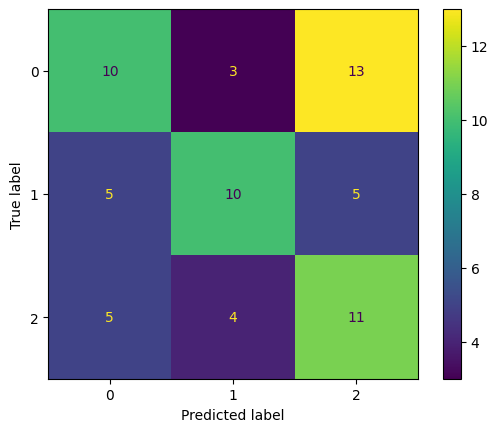

In [10]:
cm = confusion_matrix(y_true = true_labels, y_pred = predicted_labels)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
plt.close()

In [11]:
def plot_model_results(history):
    plt.figure(figsize=(8, 8))
    sns.set_style("darkgrid")
    # Plot train and validation loss
    plt.subplot(2,2,1)
    sns.lineplot(history.history['loss'], label='Train Loss')
    sns.lineplot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot train and validation accuracy
    plt.subplot(2,2,2)
    sns.lineplot(history.history['categorical_accuracy'], label='Train Acc')
    sns.lineplot(history.history['val_categorical_accuracy'], label='Validation Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
   
    # Plot train and validation AUC
    plt.subplot(2,2,3)
    sns.lineplot(history.history['auc'], label='Train AUC')
    sns.lineplot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model ACU')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()

    plt.subplots_adjust(wspace=0.3, hspace= 0.3)
    plt.show()
    plt.close()


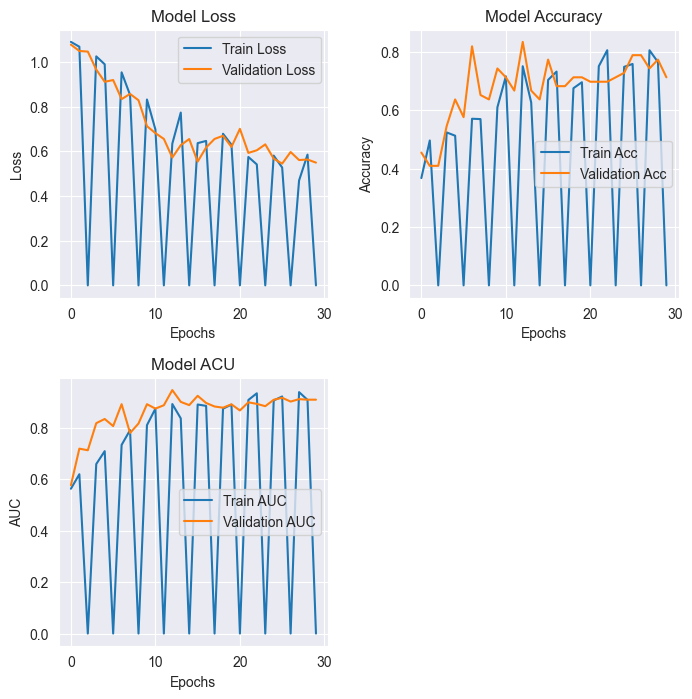

In [12]:
plot_model_results(history)